In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Read data sets

In [2]:
crim_rate = pd.read_csv("../data/raw/crim_rate.csv")
crim_offence = pd.read_csv("../data/raw/crim_offence.csv")
crim_location = pd.read_csv("../data/raw/crim_location.csv")
crim_rate.shape, crim_offence.shape, crim_location.shape

((52877, 10), (343948, 9), (53310, 7))

##### Criminal incidents rate

In [4]:
crim_rate.head()

,Year,Year ending,Police Service Area,Local Government Area,Offence Division,Offence Subdivision,Offence Subgroup,Offence Count,"PSA Rate per 100,000 population","LGA Rate per 100,000 population"
0,2020,December,Ballarat,Ballarat,A Crimes against the person,A10 Homicide and related offences,A10 Homicide and related offences,2,1.681350,1.794160
1,2020,December,Ballarat,Ballarat,A Crimes against the person,A20 Assault and related offences,A211 FV Serious assault,146,122.738528,130.973665
2,2020,December,Ballarat,Ballarat,A Crimes against the person,A20 Assault and related offences,A212 Non-FV Serious assault,128,107.606381,114.826227
3,2020,December,Ballarat,Ballarat,A Crimes against the person,A20 Assault and related offences,"A22 Assault police, emergency services or othe...",51,42.874417,45.751075
4,2020,December,Ballarat,Ballarat,A Crimes against the person,A20 Assault and related offences,A231 FV Common assault,298,250.521106,267.329809


In [17]:
# Top Offences
crim_rate["Offence Division"].value_counts().sort_values()

C Drug offences                          4000
F Other offences                         4147
E Justice procedures offences            6023
D Public order and security offences     8791
A Crimes against the person             14767
B Property and deception offences       15149
Name: Offence Division, dtype: int64

In [16]:
crim_rate.groupby(["Offence Division"])["Offence Count"].sum().sort_values()

Offence Division
F Other offences                          53898
C Drug offences                          280887
D Public order and security offences     349382
E Justice procedures offences            576005
A Crimes against the person              719026
B Property and deception offences       2856201
Name: Offence Count, dtype: int64

<AxesSubplot:xlabel='Offence Division'>

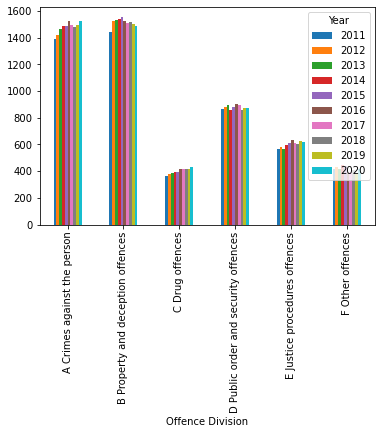

In [32]:
pd.crosstab(crim_rate["Offence Division"],crim_rate["Year"]).plot.bar()

<AxesSubplot:xlabel='Offence Division'>

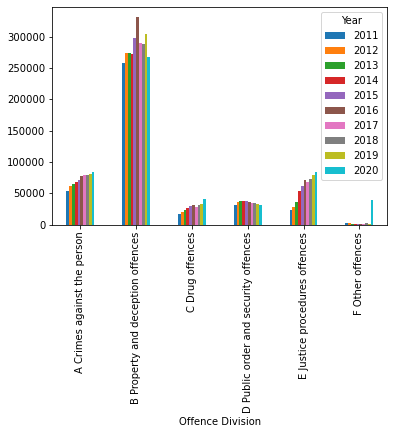

In [34]:
pd.pivot_table(crim_rate, values = 'Offence Count', index = 'Offence Division',
               columns = 'Year',aggfunc ='sum').plot.bar()

In [14]:
# Top 20 LGA
top_lgas = crim_rate.groupby(["Local Government Area"])["Offence Count", 
                                             "PSA Rate per 100,000 population"].sum()

top_lgas.sort_values(by="PSA Rate per 100,000 population", ascending=False).head(20)

/home/danph/anaconda3/envs/pysal-workshop/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Offence Count,"PSA Rate per 100,000 population"
Local Government Area,,
Melbourne,347626,250015.981097
Latrobe,123836,165708.261891
Yarra,126970,138922.413687
Greater Shepparton,76445,117978.569354
Mildura,63009,115950.061683
Port Phillip,123058,114317.911883
Greater Dandenong,175736,111514.354557
Frankston,144684,104796.456796
Maribyrnong,86641,101767.083373
